In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

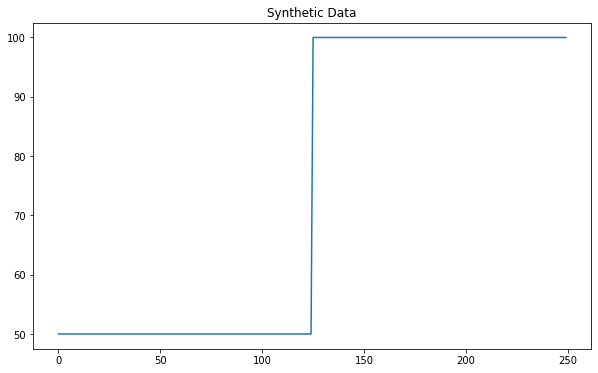

In [2]:
x = np.arange(0, 250)
y = np.linspace(50, 50, 250)
y1 = 100
for i in range (125, 250):
    y[i] = y1
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [3]:
pd.DataFrame(sd).describe()

,0
count,250.000000
mean,75.000000
std,25.050151
min,50.000000
25%,50.000000
50%,75.000000
75%,100.000000
max,100.000000


In [4]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,50.0
1,1,50.0
2,2,50.0
3,3,50.0
4,4,50.0
...,...,...
245,245,100.0
246,246,100.0
247,247,100.0
248,248,100.0


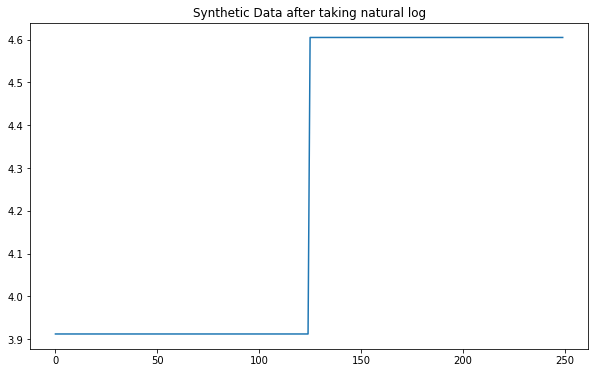

In [5]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [6]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,3.912023
1,1,3.912023
2,2,3.912023
3,3,3.912023
4,4,3.912023
...,...,...
245,245,4.605170
246,246,4.605170
247,247,4.605170
248,248,4.605170


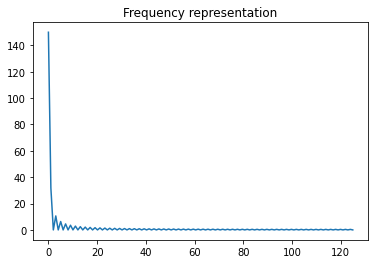

In [7]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

In [8]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,1.500000e+02
1,0.004,3.183183e+01
2,0.008,1.054199e-15
3,0.012,1.061284e+01
4,0.016,3.040060e-15
...,...,...
120,0.480,2.842171e-17
121,0.484,4.005059e-01
122,0.488,9.134828e-16
123,0.492,4.001264e-01


In [9]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)

In [10]:
quefrency = np.fft.rfftfreq(np.log(yf).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf)))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [11]:
quefrency[1:]

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8,
       20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
       22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2,
       24.4, 24.6, 24.8, 25. ])

In [12]:
cepstrum[1:]

array([ nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj,
        nan+nanj,  nan+nanj,  nan+nanj,  nan+nanj, 

In [13]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.0,-inf
1,0.2,NaN
2,0.4,NaN
3,0.6,NaN
4,0.8,NaN
...,...,...
121,24.2,NaN
122,24.4,NaN
123,24.6,NaN
124,24.8,NaN


In [14]:
# GMM on normal time series data
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [15]:
# GMM on natural log values of time series data 
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [16]:
# GMM on fft data
dfx = freq_ampli.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [17]:
# GMM on cepstrum data 
# GMM doesn't work in this case
dfx = cep.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Results of GMM on normal time series data

In [18]:
seasonal_data.describe()

,Time,Value
count,250.000000,250.000000
mean,124.500000,75.000000
std,72.312977,25.050151
min,0.000000,50.000000
25%,62.250000,50.000000
50%,124.500000,75.000000
75%,186.750000,100.000000
max,249.000000,100.000000


In [19]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [20]:
best_gmm0.weights_

array([0.5, 0.5])

In [21]:
best_gmm0.means_

array([[100.],
       [ 50.]])

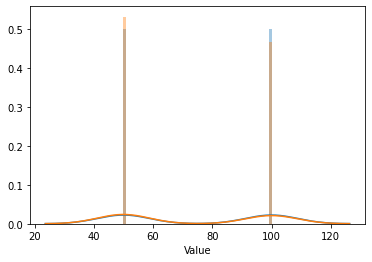

In [22]:
#Time Series
sns.distplot(seasonal_data['Value'],bins=50)
z,_ = best_gmm0.sample(250)
sns.distplot(z,bins=50)

In [23]:
#Time Series
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
print(best_gmm0.score(z))

5.29566956521752
4.774645547893782


Results of GMM on natural log values of time series data

In [24]:
nlog_data.describe()

,Time,Log Value
count,250.000000,250.000000
mean,124.500000,4.258597
std,72.312977,0.347269
min,0.000000,3.912023
25%,62.250000,3.912023
50%,124.500000,4.258597
75%,186.750000,4.605170
max,249.000000,4.605170


In [25]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
best_gmm1.weights_

array([0.5, 0.5])

In [27]:
best_gmm1.means_

array([[3.91202301],
       [4.60517019]])

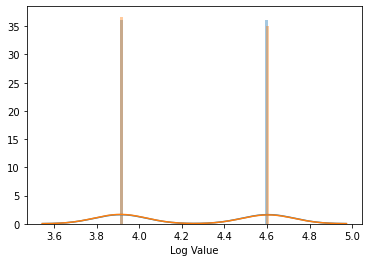

In [28]:
#Time Series - Log
sns.distplot(nlog_data['Log Value'],bins=50)
z,_ = best_gmm1.sample(250)
sns.distplot(z,bins=50)

In [29]:
#Time Series - Log
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
print(best_gmm1.score(z))

5.295669527018744
4.785358228456595


Results of GMM on fft data

In [30]:
freq_ampli.describe()

,Freq,Ampli
count,125.000000,1.250000e+02
mean,0.248000,2.005665e+00
std,0.144914,1.369221e+01
min,0.000000,0.000000e+00
25%,0.124000,2.898457e-16
50%,0.248000,4.001264e-01
75%,0.372000,5.766570e-01
max,0.496000,1.500000e+02


In [31]:
best_gmm2

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [32]:
best_gmm2.weights_

array([0.22667317, 0.00806452, 0.00806452, 0.0787604 , 0.49998214,
       0.17845526])

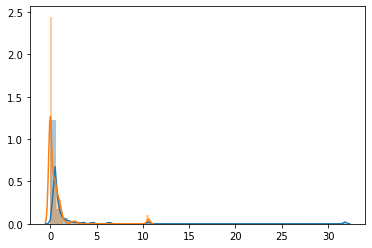

In [33]:
#Frequency
freq1 = freq_ampli.iloc[1:,1:]
y,_ = best_gmm2.sample(125)
sns.distplot(freq1)
sns.distplot(y)

In [34]:
#Freq
print(best_gmm2.score(freq1))
print(best_gmm2.score(y))

2.153520382825557
2.1114152872745064
